In [16]:
from o3fire.utils import ppx_to_numden
from o3fire.photochemical_age import bimolecular_rate_law
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
merged_df = pd.read_csv("/home/jpalmo/fs09/Projects/O3Fire/model_eval/output/model_obs_2025.4.16.csv")

/tmp/ipykernel_774362/730740274.py:1: DtypeWarning: Columns (240,242) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("/home/jpalmo/fs09/Projects/O3Fire/model_eval/output/model_obs_2025.4.16.csv")


In [3]:
merged_df['NOx_model'] = merged_df['NO_model'] + merged_df['NO2_model']
merged_df['NOx_nested_model'] = merged_df['NO_nested_model'] + merged_df['NO2_nested_model']

In [7]:
nested_df = merged_df[~(merged_df['N2O_nested_model'].isna())]
nested_df = nested_df[(nested_df['regime']=='fire')]

# Plot

### Figure S11

In [9]:
mpl.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams['patch.linewidth'] = 1

/home/jpalmo/.conda/envs/o3fire/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


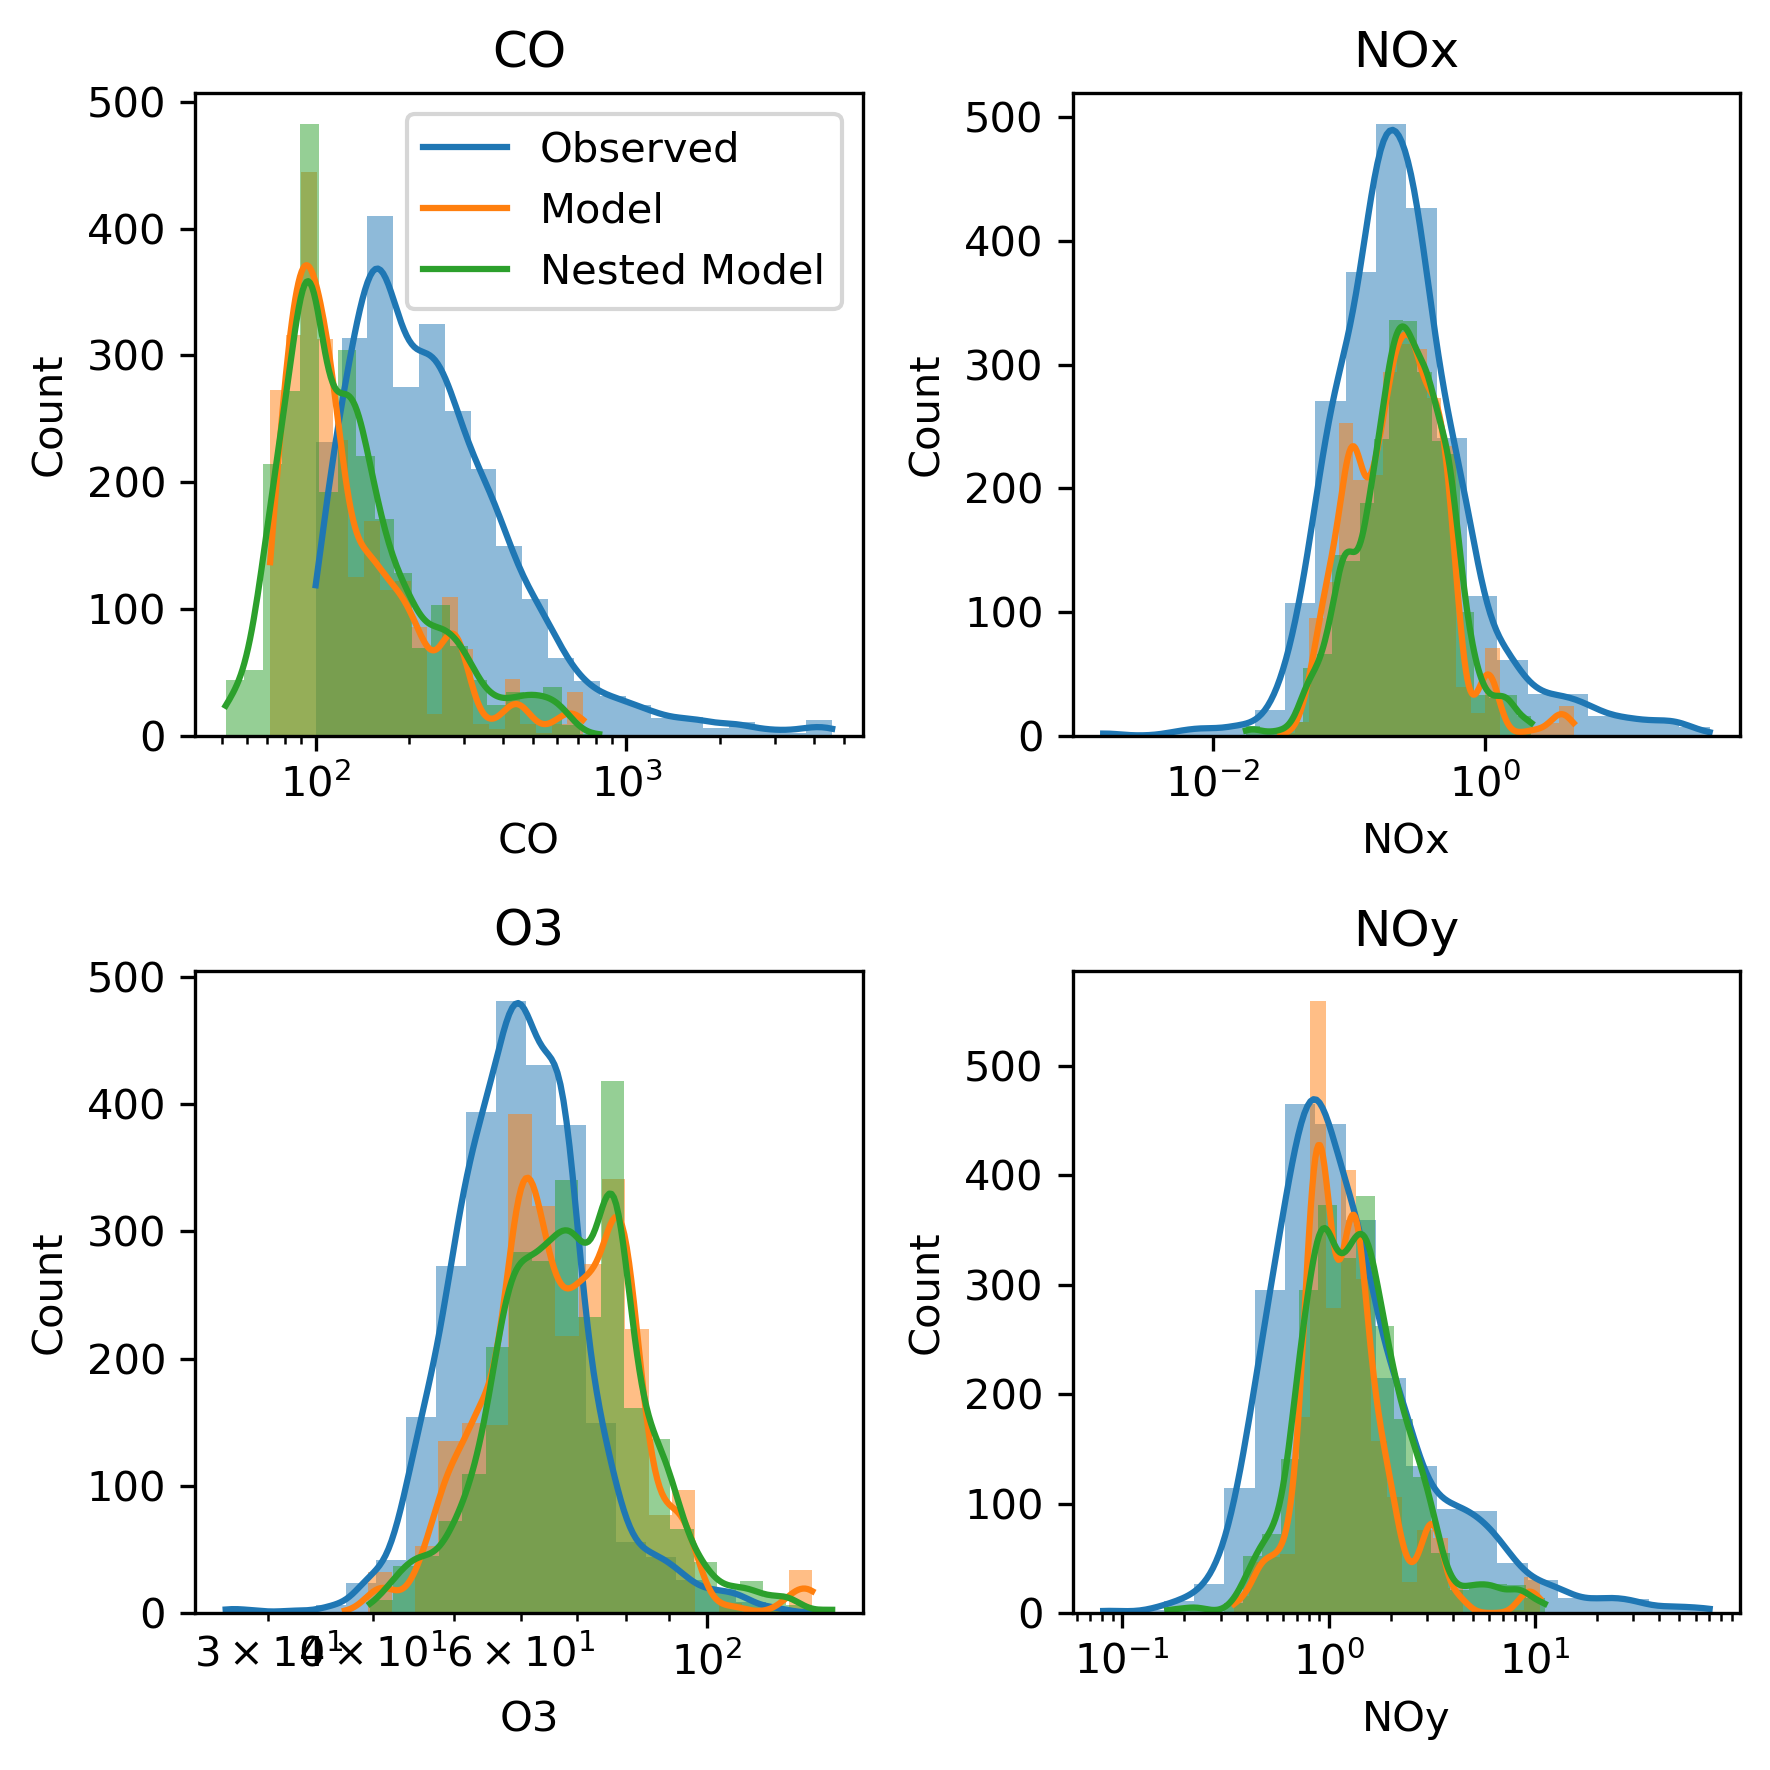

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=300)

# Plot 1: CO
sns.histplot(nested_df['CO']*1e-3, bins=20, log_scale=True, kde=True, ax=axes[0, 0])
sns.histplot(nested_df['CO_model']*1e9, bins=20, kde=True, ax=axes[0, 0])
sns.histplot(nested_df['CO_nested_model']*1e9, bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('CO')
axes[0, 0].legend(['Observed', 'Model', 'Nested Model'])

# Plot 2: NOx
sns.histplot(nested_df['NOx']*1e-3, bins=20, log_scale=True, kde=True, ax=axes[0, 1])
sns.histplot(nested_df['NOx_model']*1e9, bins=20, kde=True, ax=axes[0, 1])
sns.histplot(nested_df['NOx_nested_model']*1e9, bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('NOx')

# Plot 3: O3
sns.histplot(nested_df['O3']*1e-3, bins=20, log_scale=True, kde=True, ax=axes[1, 0])
sns.histplot(nested_df['O3_model']*1e9, bins=20, kde=True, ax=axes[1, 0])
sns.histplot(nested_df['O3_nested_model']*1e9, bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('O3')

# Plot 4: NOy
tmp = nested_df[nested_df['NOy'] > 0]
sns.histplot(tmp['NOy']*1e-3, bins=20, log_scale=True, kde=True, ax=axes[1, 1])
sns.histplot(tmp['NOy_model']*1e9, bins=20, kde=True, ax=axes[1, 1])
sns.histplot(tmp['NOy_nested_model']*1e9, bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('NOy')

plt.tight_layout()

#save figure as pdf
plt.savefig("../../figures/supfig_11.pdf", bbox_inches='tight', dpi=300)
plt.show()

### Figure S12

In [17]:
merged_df['O3/CO_model'] = merged_df['O3_delta_campaignsplit_model']/merged_df['CO_delta_campaignsplit_model']
merged_df['O3/CO_nested_model'] = merged_df['O3_nested_delta_campaignsplit_model']/merged_df['CO_nested_delta_campaignsplit_model']
ohr_nox = ppx_to_numden(merged_df['NO_model']*1e9, 'ppb')*bimolecular_rate_law(3.31E-11, -0.3, 0.0) + ppx_to_numden(merged_df['NO2_model']*1e9, 'ppb')*bimolecular_rate_law(2.70E-11, 0.0, 0.0)
ohr_co = ppx_to_numden(merged_df['CO_model']*1e9, 'ppb')*bimolecular_rate_law(1.50E-13, 0.0, 0.0)
merged_df['theta_model'] = ohr_nox / ohr_co
far_field = merged_df[merged_df['age'] > 20]
far_field['NOx'] = far_field['NOx']*1e-3
far_field['NOx_model'] = far_field['NOx_model']*1e9
far_field['NOx_delta'] = far_field['NOx_delta']*1e-3
far_field['NOx_delta_model'] = far_field['NOx_delta_campaignsplit_model']*1e9
far_field['O3'] = far_field['O3']*1e-3
far_field['O3_model'] = far_field['O3_model']*1e9
far_field['O3_delta'] = far_field['O3_delta']*1e-3
far_field['O3_delta_model'] = far_field['O3_delta_campaignsplit_model']*1e9

/tmp/ipykernel_774362/853394527.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_field['NOx'] = far_field['NOx']*1e-3
/tmp/ipykernel_774362/853394527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_field['NOx_model'] = far_field['NOx_model']*1e9
/tmp/ipykernel_774362/853394527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [25]:
far_field['NOx_delta_model_category'] = np.where(far_field['NOx_delta_model'] > far_field['NOx_delta_model'].quantile(0.5), r'High Model $NO_x$', r'Low Model $NO_x$')
far_field['NOx_delta_category'] = np.where(far_field['NOx_delta'] > far_field['NOx_delta'].quantile(0.5), r'High $NO_x$', r'Low $NO_x$')

/tmp/ipykernel_774362/3087186238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_field['NOx_delta_model_category'] = np.where(far_field['NOx_delta_model'] > far_field['NOx_delta_model'].quantile(0.5), r'High Model $NO_x$', r'Low Model $NO_x$')
/tmp/ipykernel_774362/3087186238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_field['NOx_delta_category'] = np.where(far_field['NOx_delta'] > far_field['NOx_delta'].quantile(0.5), r'High $NO_x$', r'Low $NO_x$')


In [33]:
far_field['theta_delta_model_category'] = np.where(far_field['theta_model'] > far_field['theta_model'].quantile(0.5), r"High Model $\theta$'", r"Low Model $\theta$'")
far_field['theta_delta_category'] = np.where(far_field['theta'] > far_field['theta'].quantile(0.5), r"High $\theta$'", r"Low $\theta$'")

/tmp/ipykernel_774362/399618141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_field['theta_delta_model_category'] = np.where(far_field['theta_model'] > far_field['theta_model'].quantile(0.5), r"High Model $\theta$'", r"Low Model $\theta$'")
/tmp/ipykernel_774362/399618141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  far_field['theta_delta_category'] = np.where(far_field['theta'] > far_field['theta'].quantile(0.5), r"High $\theta$'", r"Low $\theta$'")


/home/jpalmo/.conda/envs/o3fire/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_774362/3401997369.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['x'] = 1
/tmp/ipykernel_774362/3401997369.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['y'] = 2
/tmp/ipykernel_774362/3401997369.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

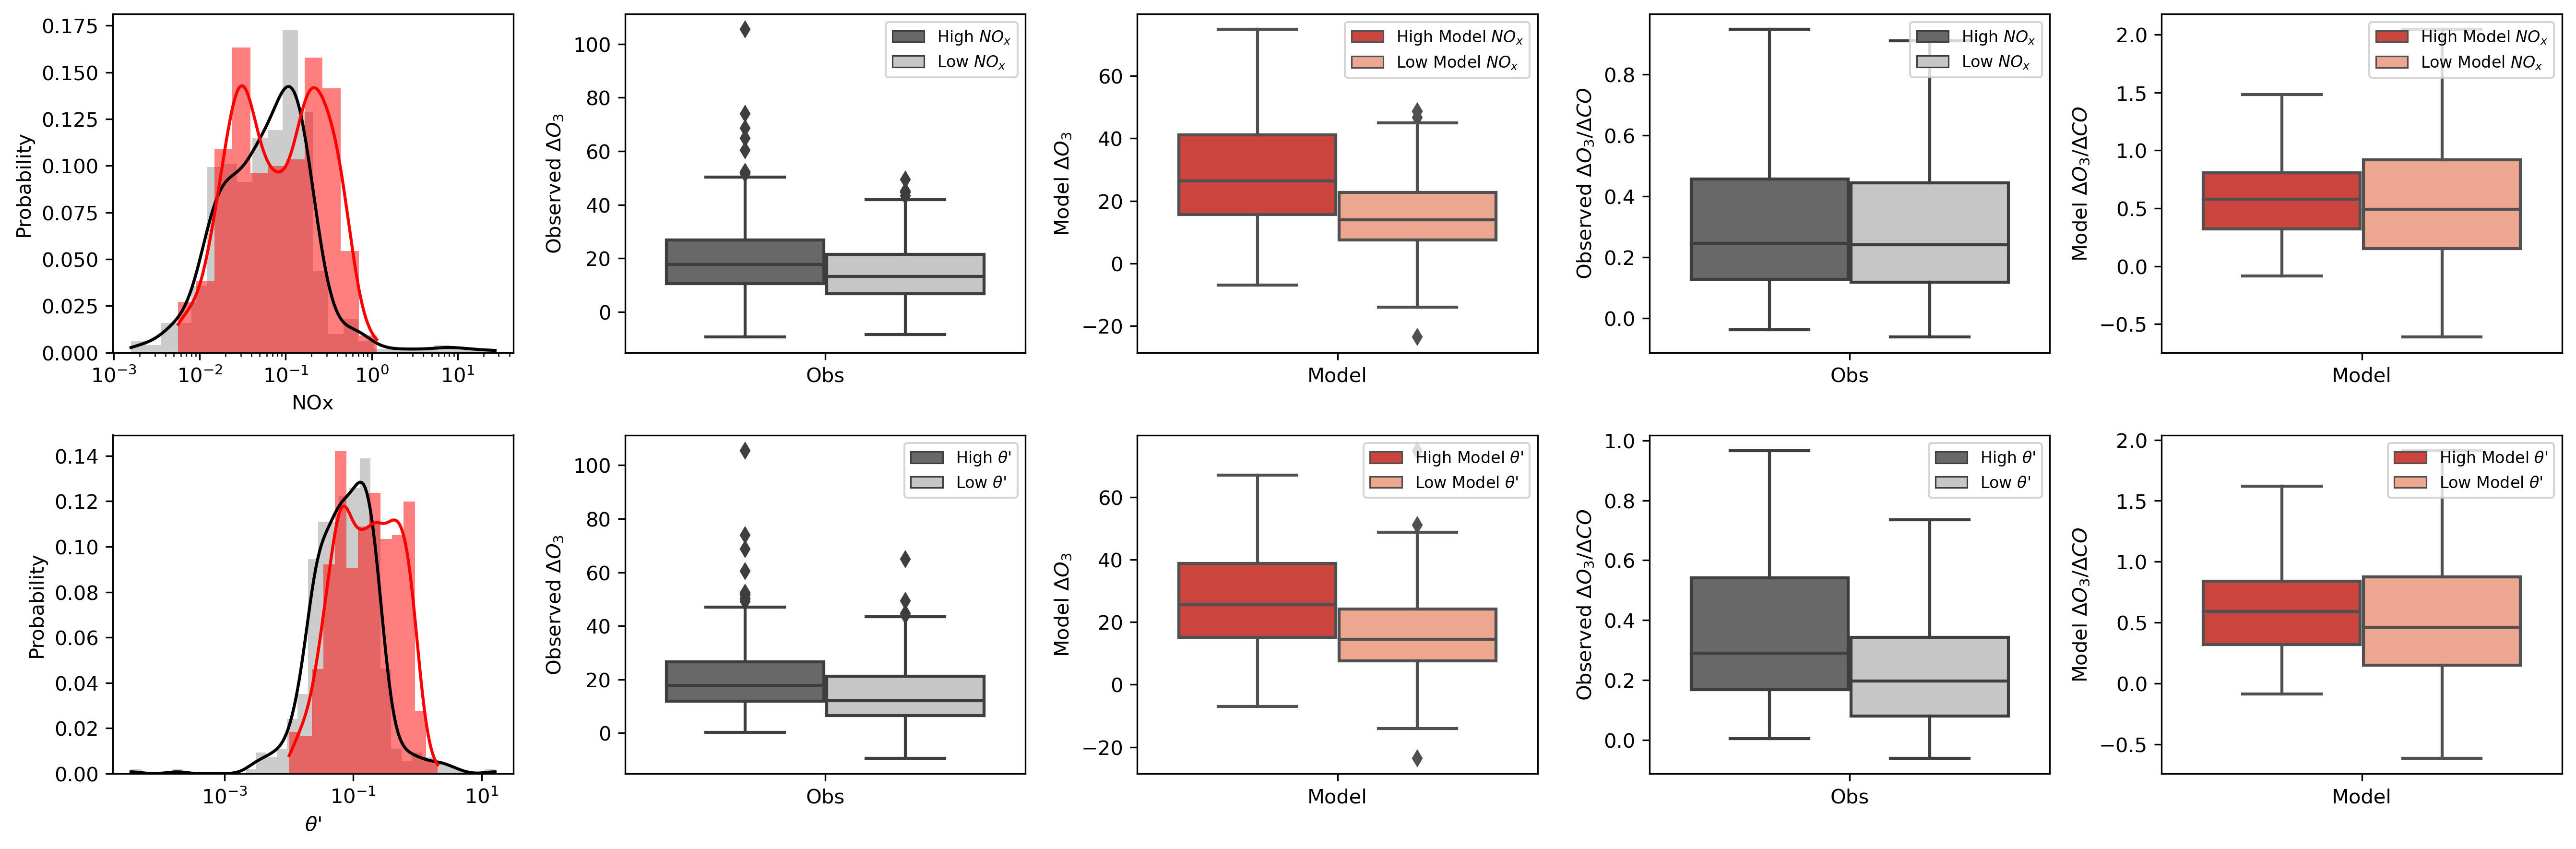

In [40]:
fig, axs = plt.subplots(2, 5, figsize=(18, 6), dpi=300)

axs = axs.flatten()

sns.histplot(far_field['NOx'], kde=True, stat='probability', color='k', alpha=0.2, label='NOx', log_scale=True, ax=axs[0])
sns.histplot(far_field['NOx_model'], kde=True, stat='probability', color='red', label='NOx_model', log_scale=True, ax=axs[0])

tmp = far_field[far_field['theta'] > 0]

sns.histplot(tmp['theta'], kde=True, stat='probability', color='k', alpha=0.2, label='theta', log_scale=True, ax=axs[5])
sns.histplot(tmp['theta_model'], kde=True, stat='probability', color='red', label='theta_model', log_scale=True, ax=axs[5])
axs[5].set_xlabel(r"$\theta$'")

tmp = far_field
tmp['x'] = 1
sns.boxplot(data=tmp, x='x', y="O3_delta", hue="NOx_delta_category", ax=axs[1], palette='Greys_r')
tmp['y'] = 2
tmp.sort_values('NOx_delta_model_category', inplace=True)
sns.boxplot(data=tmp, x='y', y="O3_delta_model", hue="NOx_delta_model_category", ax=axs[2], palette='Reds_r')
# Set the x-ticks and their labels
axs[1].set_xticklabels(['Obs',])
axs[2].set_xticklabels(['Model'])

axs[1].set_xlabel('')
axs[2].set_xlabel('')

axs[1].set_ylabel(r'Observed $\Delta O_3$')
axs[2].set_ylabel(r'Model $\Delta O_3$')

tmp['x'] = 1
sns.boxplot(data=tmp, x='x', y="O3/CO", hue="NOx_delta_category", ax=axs[3], palette='Greys_r', showfliers=False)
tmp['y'] = 2
tmp.sort_values('NOx_delta_model_category', inplace=True)
sns.boxplot(data=tmp, x='y', y="O3/CO_model", hue="NOx_delta_model_category", ax=axs[4], palette='Reds_r', showfliers=False)
# Set the x-ticks and their labels
axs[3].set_xticklabels(['Obs',])
axs[4].set_xticklabels(['Model'])

axs[3].set_xlabel('')
axs[4].set_xlabel('')

axs[3].set_ylabel(r'Observed $\Delta O_3 / \Delta CO$')
axs[4].set_ylabel(r'Model $\Delta O_3 / \Delta CO$')


tmp['x'] = 1
sns.boxplot(data=tmp, x='x', y="O3_delta", hue="theta_delta_category", ax=axs[6], palette='Greys_r')
tmp['y'] = 2
tmp.sort_values('NOx_delta_model_category', inplace=True)
sns.boxplot(data=tmp, x='y', y="O3_delta_model", hue="theta_delta_model_category", ax=axs[7], palette='Reds_r')
# Set the x-ticks and their labels
axs[6].set_xticklabels(['Obs',])
axs[7].set_xticklabels(['Model'])

axs[6].set_xlabel('')
axs[7].set_xlabel('')

axs[6].set_ylabel(r'Observed $\Delta O_3$')
axs[7].set_ylabel(r'Model $\Delta O_3$')

tmp['x'] = 1
sns.boxplot(data=tmp, x='x', y="O3/CO", hue="theta_delta_category", ax=axs[8], palette='Greys_r', showfliers=False)
tmp['y'] = 2
tmp.sort_values('NOx_delta_model_category', inplace=True)
sns.boxplot(data=tmp, x='y', y="O3/CO_model", hue="theta_delta_model_category", ax=axs[9], palette='Reds_r', showfliers=False)
# Set the x-ticks and their labels
axs[8].set_xticklabels(['Obs',])
axs[9].set_xticklabels(['Model'])

axs[8].set_xlabel('')
axs[9].set_xlabel('')

axs[8].set_ylabel(r'Observed $\Delta O_3 / \Delta CO$')
axs[9].set_ylabel(r'Model $\Delta O_3 / \Delta CO$')


# Adjust the legend if needed
for ax in axs[1:5]:
    ax.legend(loc='upper right', fontsize=8)
# Adjust the legend if needed
for ax in axs[6:10]:
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
#save figure as pdf
plt.savefig("../../figures/supfig_12.pdf", bbox_inches='tight', dpi=300)
plt.show()